In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')


file_path='/content/drive/My Drive/machine learning/headbrain.csv'
df=pd.read_csv(file_path)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [17]:

X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values


X = np.array(X)
Y = np.array(Y)

mean_x = np.mean(X)
mean_y = np.mean(Y)


numerator = np.sum((X - mean_x) * (Y - mean_y))
denominator = np.sum((X - mean_x) ** 2)
w1 = numerator / denominator
w0 = mean_y - (w1 * mean_x)

print("Manual Method Results:")
print(f"w0 (Intercept): {w0}")
print(f"w1 (Slope): {w1}")


Manual Method Results:
w0 (Intercept): 325.5734210494428
w1 (Slope): 0.2634293394893993


In [18]:

Y_pred_manual = w0 + w1 * X

mse_manual = np.mean((Y - Y_pred_manual) ** 2)
print(f"Manual MSE: {mse_manual}")


Manual MSE: 5201.3840280023305


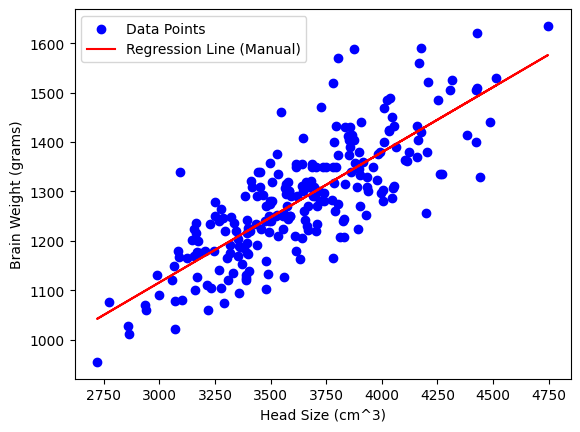


Scikit-learn Results:
w0 (Intercept): 325.5734210494426
w1 (Slope): 0.26342933948939934


In [19]:

plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred_manual, color="red", label="Regression Line (Manual)")
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.legend()
plt.show()


X_reshaped = X.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_reshaped, Y)


print("\nScikit-learn Results:")
print(f"w0 (Intercept): {reg.intercept_}")
print(f"w1 (Slope): {reg.coef_[0]}")


Scikit-learn MSE: 5201.3840280023305


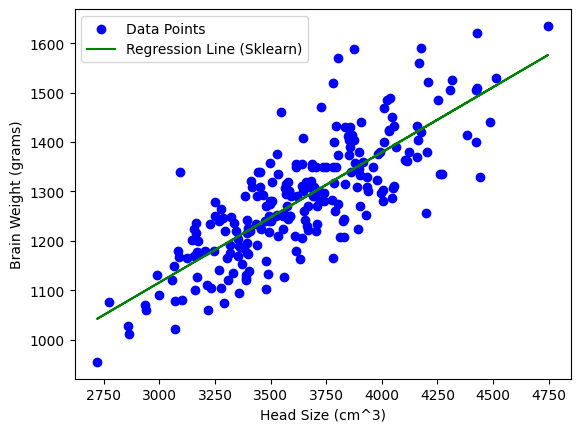

In [20]:
Y_pred_sklearn = reg.predict(X_reshaped)

# MSE with sklearn
mse_sklearn = mean_squared_error(Y, Y_pred_sklearn)
print(f"Scikit-learn MSE: {mse_sklearn}")

# 10. Plot regression line (Sklearn)
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred_sklearn, color="green", label="Regression Line (Sklearn)")
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.legend()
plt.show()